## Compare Data Completeness Over Time

**Description**: Analyze the trend of missing data in `"sales_data.csv"` over several months stored in a "date" column. Visualize missing data rates by month.

/tmp/ipykernel_12855/1259630925.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_month = df.groupby("month").apply(lambda x: x.isnull().mean() * 100)


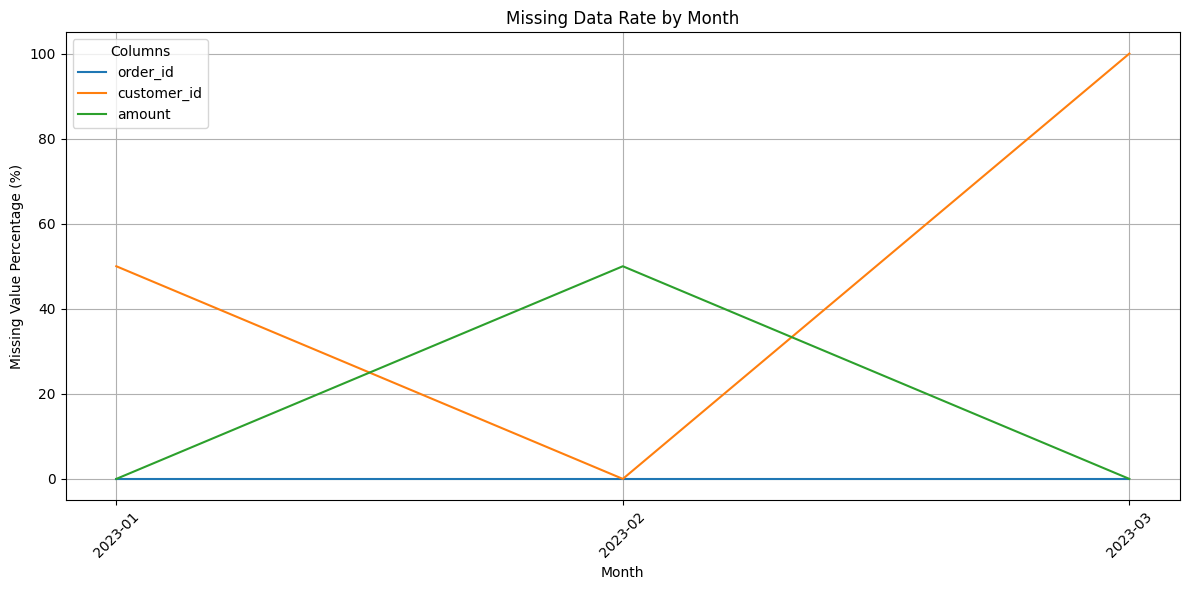

In [1]:
# Write your code from here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("sales_data.csv", parse_dates=["date"])

# Extract month (year + month) from the date
df["month"] = df["date"].dt.to_period("M")

# Calculate percentage of missing values per column by month
missing_by_month = df.groupby("month").apply(lambda x: x.isnull().mean() * 100)

# Plot missing data trend for selected columns
columns_to_plot = [col for col in df.columns if col not in ["date", "month"]]

# Plot
plt.figure(figsize=(12, 6))
for col in columns_to_plot:
    plt.plot(missing_by_month.index.astype(str), missing_by_month[col], label=col)

plt.title("Missing Data Rate by Month")
plt.xlabel("Month")
plt.ylabel("Missing Value Percentage (%)")
plt.legend(title="Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()